## IJCAI-21

### Modelo BERT base-uncased

### Dataset DEV HypeNet usando para selecionar os melhores padrões

 - N = 49475

#### Gŕaficos do BERT log_sum_exp log(Z) no DEV inglês

 - % de pares verdadeiros por tamanho de sub-token
 - AP por padrão (inglês) no DEV
 - AP combinando os N melhores padrões (Average rank e Min rank)

DF all with OOV = 49475


<Figure size 432x288 with 0 Axes>

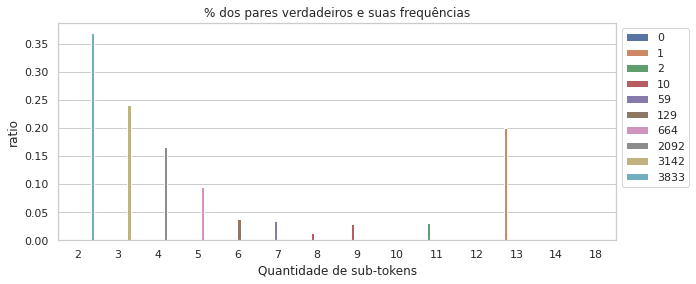

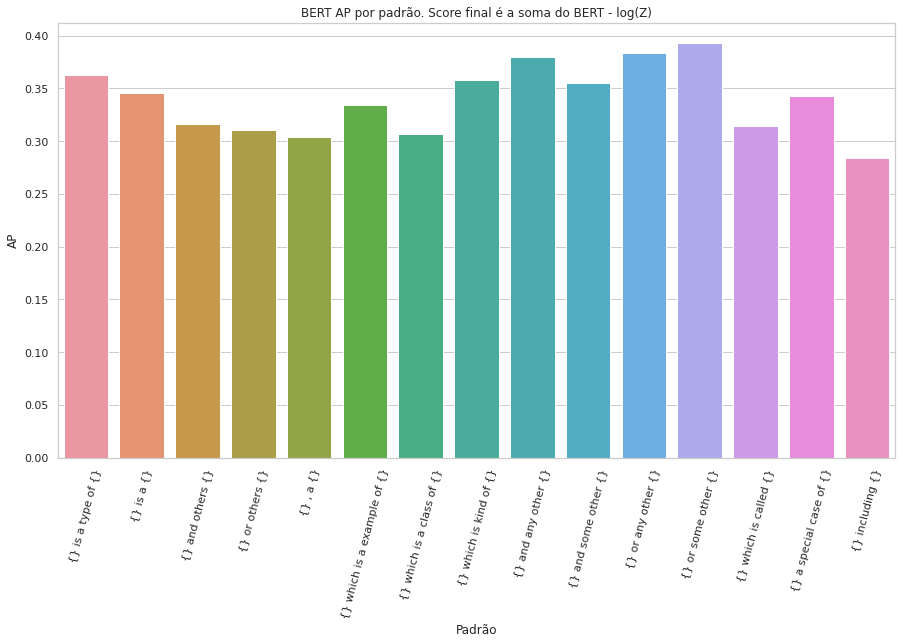

Melhores padrões usando BERT - log(Z)
['{} or some other {}', '{} or any other {}', '{} and any other {}', '{} is a type of {}', '{} which is kind of {}', '{} and some other {}', '{} is a {}', '{} a special case of {}', '{} which is a example of {}', '{} and others {}', '{} which is called {}', '{} or others {}', '{} which is a class of {}', '{} , a {}', '{} including {}']


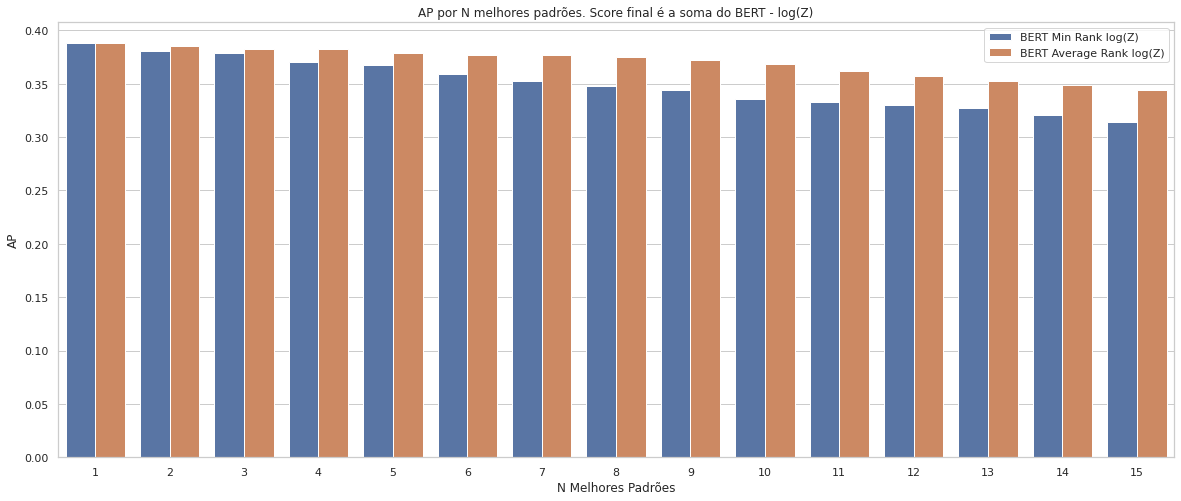

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import pandas as pd
sys.path.append("/home/gabrielescobar/hyper_bert")
import nb_utils

sns.set(style="whitegrid")
plt.clf()

#server
path_file_bert = "../../en-model/bert-base-uncased_bert_score_2020-11-11_20:24:14_HypeNet_train/HypeNet_train.json"
json_data = json.load(open(path_file_bert))

df_with_oov = nb_utils.create_dataframe(json_data, separator="\t")
pattern_unique = df_with_oov['pattern'].unique().tolist()
len_total_unique = df_with_oov['len_total'].unique().tolist()

print(f"DF all with OOV = {df_with_oov[df_with_oov['pattern'] == pattern_unique[0]].count()['hiponimo']}")

# df com oov
df_with_oov = nb_utils.logsumexp_normalization(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique)

# Balanceamento df_with_oov
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Quantidade de sub-tokens")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))

# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando BERT - log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)

# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z) 
 - Balanceamento do DEV 20% True, 80% False
 - Total de 49475 pares

In [2]:
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
1               1  mean score_final_log(z)  0.388062  BERT Average Rank log(Z)
3               2  mean score_final_log(z)  0.385261  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.382827  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.382101  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
0               1  min score_final_log(z)  0.388062  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.381060  BERT Min Rank log(Z)
4               3  min score_final_log(z)  0.379230  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.370547  BERT Min Rank log(Z)


In [3]:
# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

         true        false  total
0  9942.00000  39533.00000  49475
1     0.20095      0.79905      1


-------------------------

### Gŕaficos do BERT no DEV inglês
##### OBS: sem usar log_sum_exp

 - % de pares verdadeiros por tamanho de sub-token
 - AP por padrão (inglês) no DEV
 - AP combinando os N melhores padrões (Average rank e Min rank)

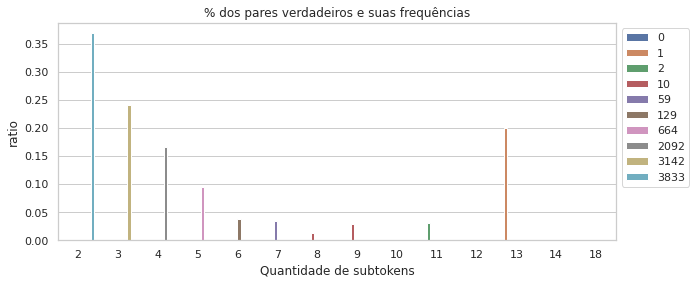

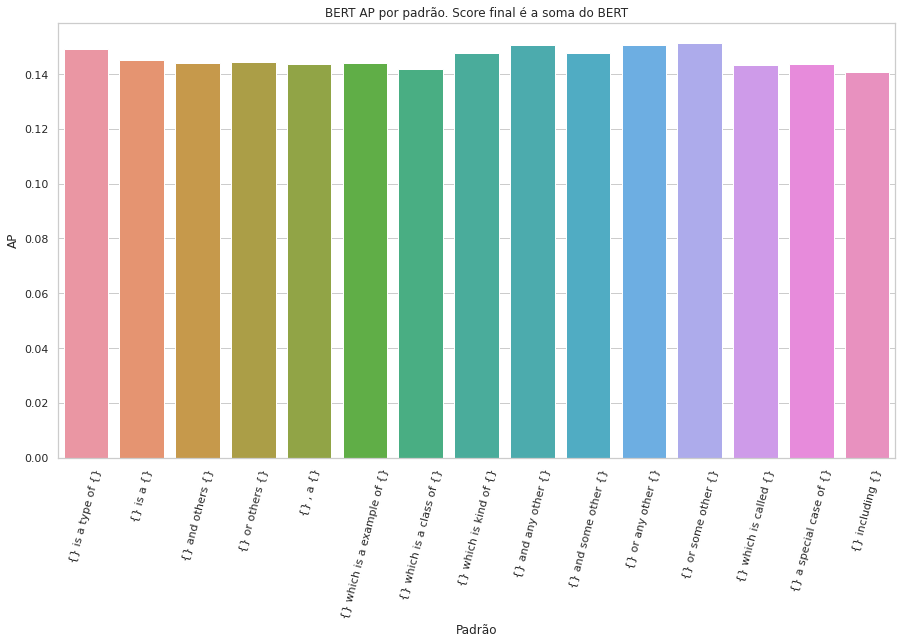

Melhores padrões usando bert_soma_total
['{} or some other {}', '{} and any other {}', '{} or any other {}', '{} is a type of {}', '{} and some other {}', '{} which is kind of {}', '{} is a {}', '{} or others {}', '{} and others {}', '{} which is a example of {}', '{} a special case of {}', '{} , a {}', '{} which is called {}', '{} which is a class of {}', '{} including {}']


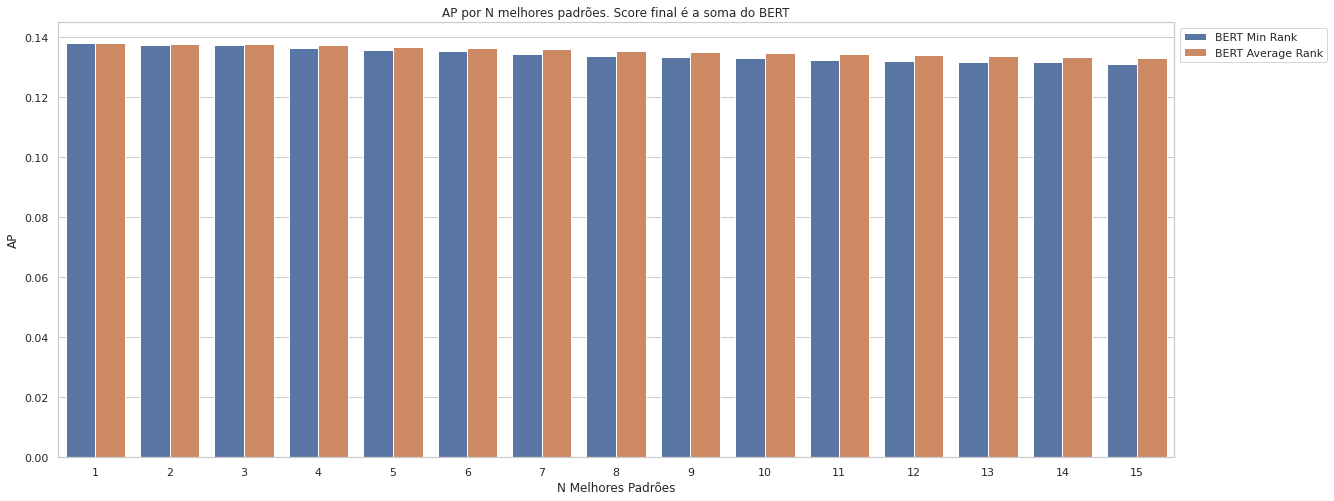

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                method        AP      method_format
1               1  mean bert_soma_total  0.138053  BERT Average Rank
3               2  mean bert_soma_total  0.137715  BERT Average Rank
5               3  mean bert_soma_total  0.137635  BERT Average Rank
7               4  mean bert_soma_total  0.137393  BERT Average Rank
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern               method        AP  method_format
0               1  min bert_soma_total  0.138053  BERT Min Rank
2               2  min bert_soma_total  0.137568  BERT Min Rank
4               3  min bert_soma_total  0.137456  BERT Min Rank
6               4  min bert_soma_total  0.136278  BERT Min Rank
         true        false  total
0  9942.00000  39533.00000  49475
1     0.20095      0.79905      1


In [4]:
# Balanceamento df_with_oov
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, patterns=pattern_unique,len_size=len_total_unique)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Quantidade de subtokens")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))

# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="bert_soma_total", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"BERT AP por padrão. Score final é a soma do BERT")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando bert_soma_total")
best_pattern_bert_soma_total = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_bert_soma_total)

# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="bert_soma_total", n_best_pattern=best_pattern_bert_soma_total)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())

plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

df_mean = df_plot[df_plot['method'] == 'mean bert_soma_total']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min bert_soma_total']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

# Test com 10 datasets em inglês
### Usando os 4 melhores padrões do HypeNet-train

### Não usar mais SEP ou DOT

In [5]:

path_json_normal = "../../en-model/bert-base-uncased_bert_score_normal_2020-11-12_15:13:01"
# path_json_dot = "../../en-model/bert-base-uncased_bert_score_dot_comb_2020-11-12_14:48:06"
# path_json_sep = "../../en-model/bert-base-uncased_bert_score_sep_comb_2020-11-12_14:48:36"

dfs = {}
pattern_unique = {}
filename = ""
for filename in os.listdir(path_json_normal):
    if os.path.isfile(os.path.join(path_json_normal, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_normal, filename))), combination=False, separator="\t")
        df['tipo'] = 'normal'
        dfs[filename + " normal"] = df
pattern_unique['normal'] = df['pattern'].unique().tolist()

# for filename in os.listdir(path_json_dot):
#     if os.path.isfile(os.path.join(path_json_dot, filename)) and filename.endswith(".json"):
#         df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_dot, filename))), combination=False, separator="\t")
#         df['tipo'] = 'dot'
#         dfs[filename + " dot"] = df
# pattern_unique['dot'] = df['pattern'].unique().tolist()
# for filename in os.listdir(path_json_sep):
#     if os.path.isfile(os.path.join(path_json_sep, filename)) and filename.endswith(".json"):
#         df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_sep, filename))), combination=True, separator="\t")
#         df['tipo'] = 'sep'
#         dfs[filename + " sep"] = df
# pattern_unique['sep'] = df['pattern'].unique().tolist()

len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

df_ratios = []
for dataset_name in dfs.keys():
    print(dataset_name)
    dname, type_dataset = dataset_name.split()
    df_ratio = nb_utils.balanceamento(dfs[dataset_name], len_size=len_total_unique, patterns=pattern_unique[type_dataset])
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = type_dataset
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

for dataset_name, df in dfs.items():
    type_dataset = dataset_name.split()[-1]
    dfs[dataset_name] = nb_utils.logsumexp_normalization(df, len_list=len_total_unique, pattern_list=pattern_unique[type_dataset])

df_ratios['dataset_format'] = df_ratios['dataset'].map(nb_utils.get_dataset_names())
df_ratios['dataset_tipo'] = df_ratios['dataset_format'] + " " + df_ratios['tipo']
df_ratios['ratio_percent'] = df_ratios['ratio'] * 100
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']


wordnet_test.json normal
Balanceamento: [1, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
baroni2012.json normal
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
HypeNet_test.json normal
Balanceamento: [1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
Weeds.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
kotlerman2010.json normal
Balanceamento: [1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
EVALution.json normal
Balanceamento: [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
LenciBenotto.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no da

# Test BERT - Log(Z) em 10 datasets inglês


### Gráficos descritivos dos datasets de test
 - % pares verdadeiros para cada tamanho de sub-token
 - Quantidade de pares por tamanho de sub-token

<Figure size 1440x576 with 0 Axes>

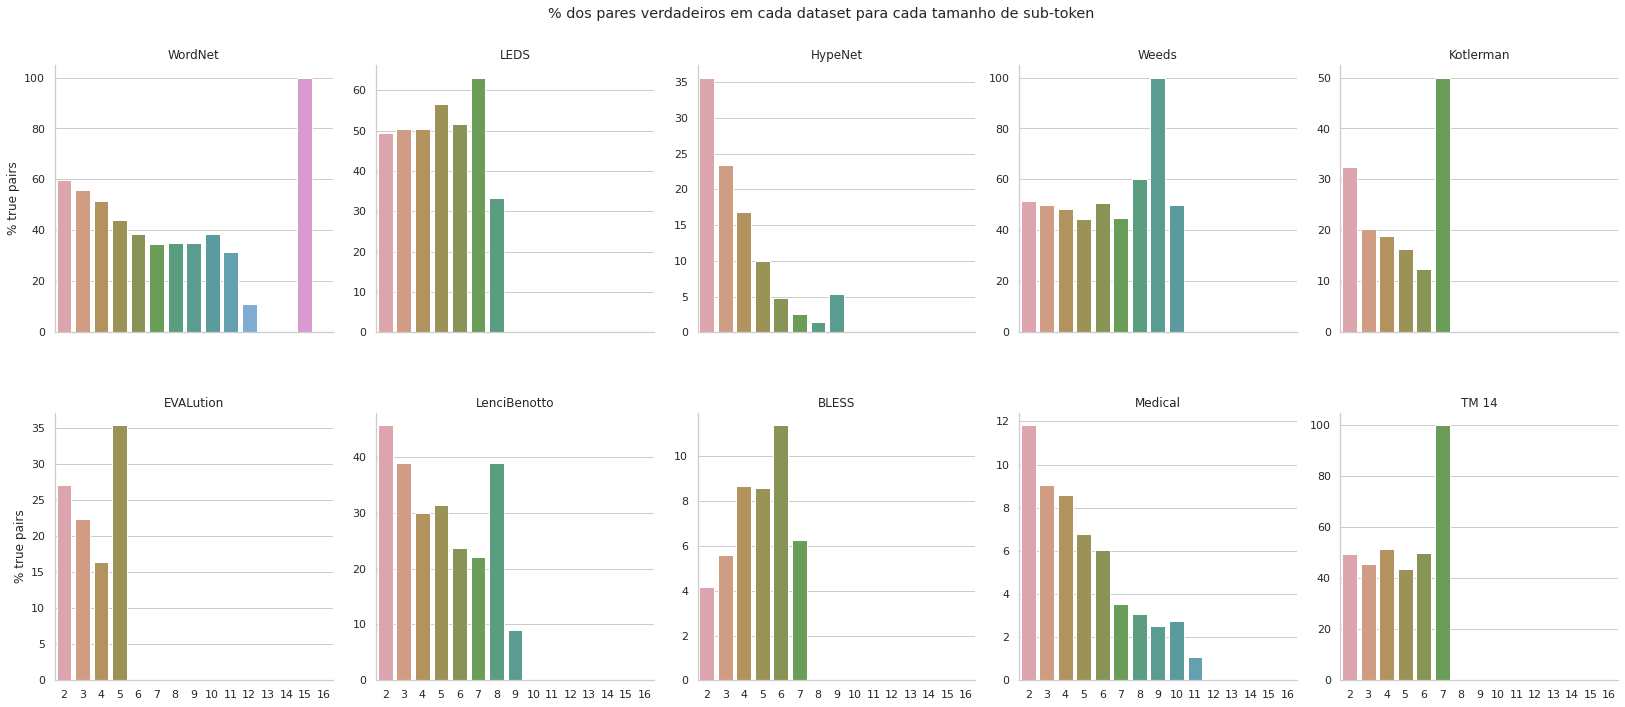

<Figure size 1440x576 with 0 Axes>

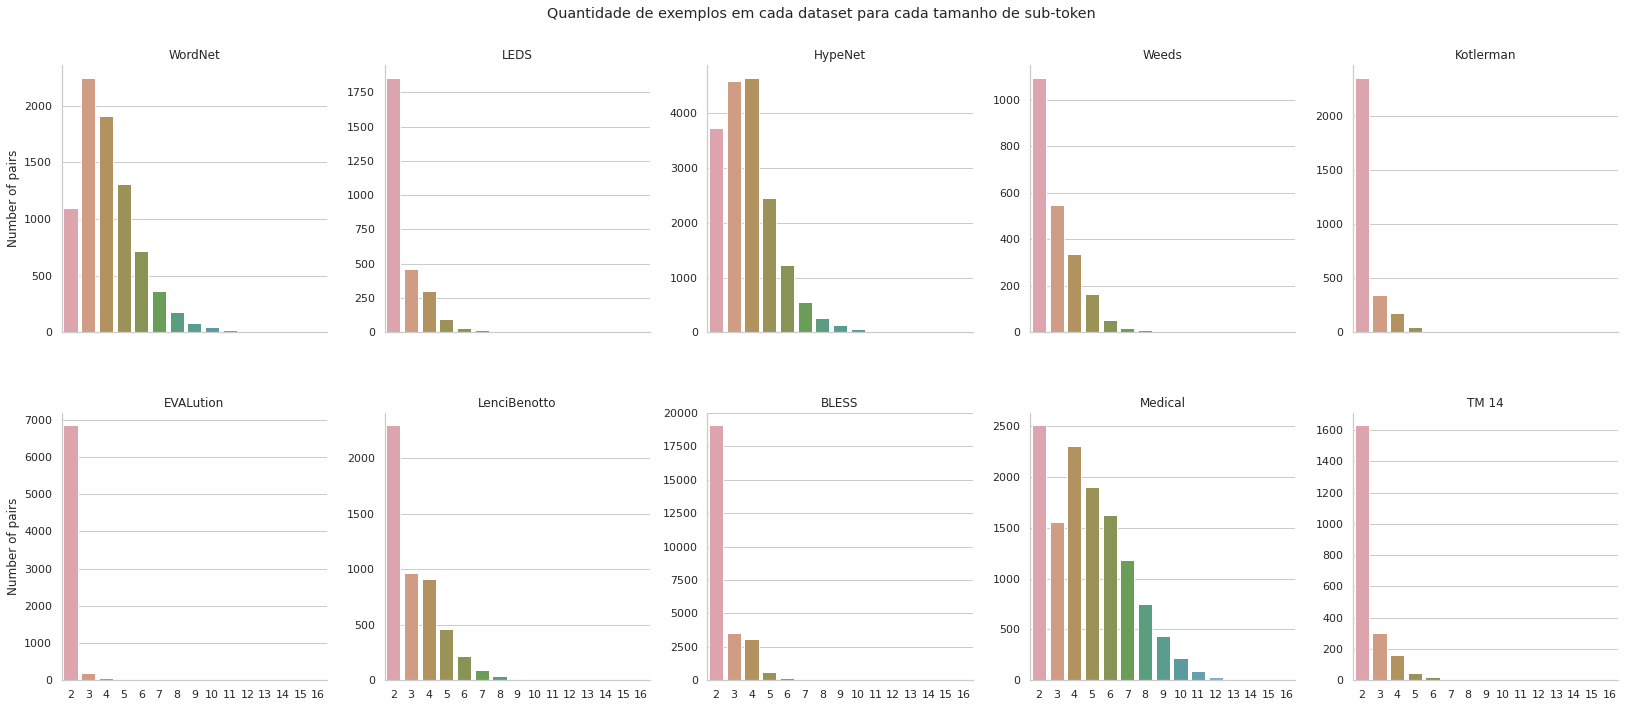

In [6]:
# % dos pares True por tamanho de subtoken
plt.figure(figsize=(20,8))
g = sns.catplot(x="len_total", y="ratio_percent", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "% true pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('% dos pares verdadeiros em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_true_por_subtoken.png', dpi=300)

plt.figure(figsize=(20,8))
# Quantidade de pares por tamanho de subtoken
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']


g = sns.catplot(x="len_total", y="total", col="dataset_format", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9, sharey=False)
(g.set_axis_labels("", "Number of pairs")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Quantidade de exemplos em cada dataset para cada tamanho de sub-token')
# plt.savefig('num_pair_por_subtoken.png', dpi=300)

In [7]:
df_en = []
dfs2 = []
best_pattern_train = nb_utils.best_pattern_HypeNet_train_logz
best_pattern_num_train = 1
for dataset_name in dfs.keys():
    dname, type_dataset = dataset_name.split()
    if type_dataset == 'normal':
        df_temp= nb_utils.compute_min_mean_ap_normal(dfs[dataset_name],
            pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
        df_temp['tipo'] = 'normal'
        dfs2.append(df_temp)
        df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                                best_pattern_num=best_pattern_num_train, tipo=type_dataset)
        df_temp['tipo'] = "normal"
        dfs2.append(df_temp)
#     elif type_dataset == 'dot':
#         df_temp= nb_utils.compute_min_mean_ap_dot(dfs[dataset_name],
#             pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
#         df_temp['tipo'] = 'dot'
#         dfs2.append(df_temp)
#         df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
#                                                 best_pattern_num=best_pattern_num_train, tipo=type_dataset)
#         df_temp['tipo'] = "dot"
#         dfs2.append(df_temp)
#     elif type_dataset == 'sep':
#         df_temp= nb_utils.compute_min_mean_ap_sep(dfs[dataset_name],
#             pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
#         df_temp['tipo'] = 'sep'
#         dfs2.append(df_temp)
#         df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
#                                                 best_pattern_num=best_pattern_num_train, tipo=type_dataset)
#         df_temp['tipo'] = "sep"
#         dfs2.append(df_temp)
    else:
        raise KeyError

df_en = pd.concat(dfs2)


### Test
### AP para cada método (BERT, DIVE e Word2vec)

#### Usando BERT - Log(Z)

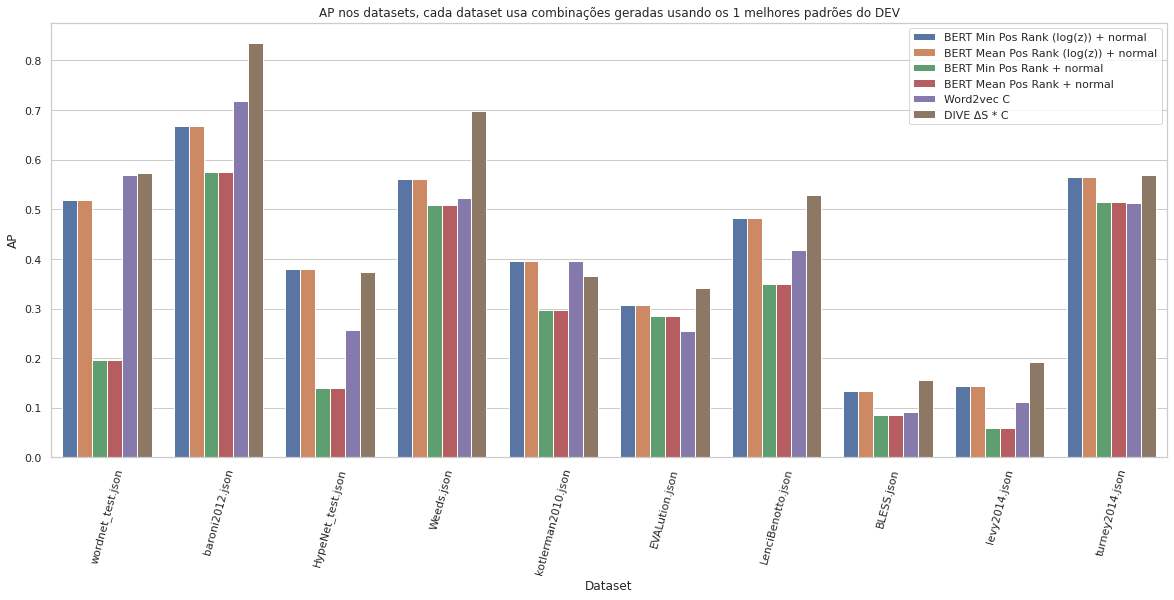

<Figure size 1440x576 with 0 Axes>

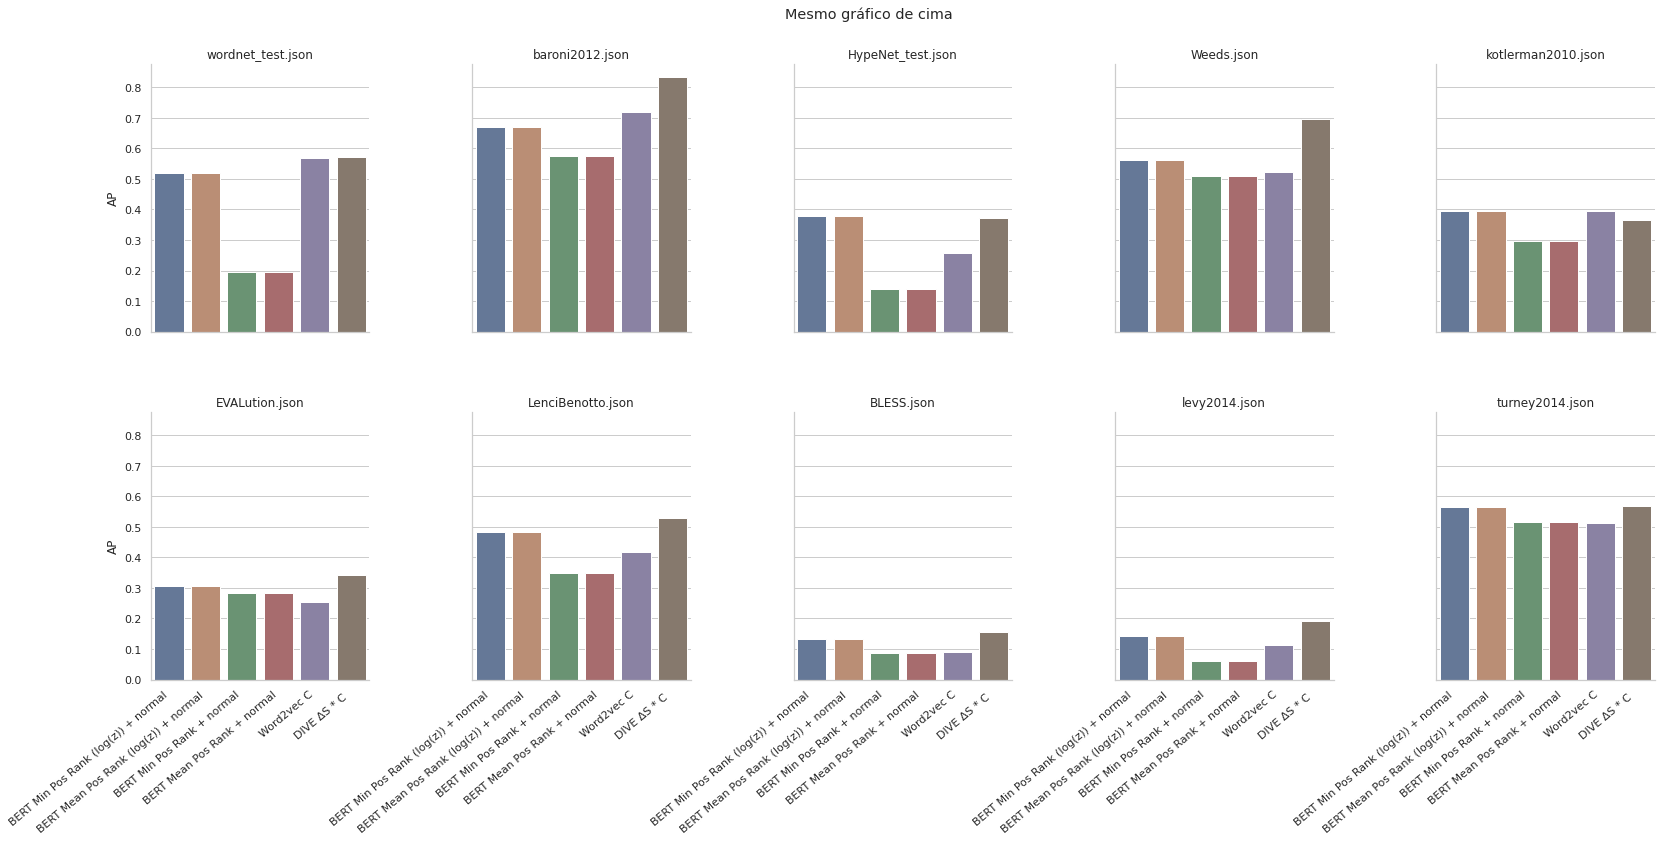

In [8]:
df_dive = nb_utils.get_df_dive()
df_dive['method_format_tipo'] = df_dive['method'].map(nb_utils.method_names)
# AP por método
df_en['method_format_tipo'] = df_en['method_format'] + " + " + df_en['tipo']
df_en = pd.concat([df_en, df_dive])
plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format_tipo", y="AP", ci="sd",data=df_en)
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format_tipo", y="AP", col="dataset", col_wrap=5,
                data=df_en, saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')

#### Dados dos gráficos acima. Apenas para visualizar mesmo!
 - Quantidade de pares e balanceamento em cada dataset
 - AP arredondando 4 casas decimais

In [9]:
# print contagem
df_print = df_ratios.groupby(['dataset', 'tipo']).sum()[['true', 'false', 'total']]
df_print['ratio'] = df_print['true'] / df_print['total']
print(df_print)

# df to csv
df_en['dataset_format'] = df_en['dataset'].map(nb_utils.get_dataset_names())
group_list = ['dataset_format', 'tipo','method_format_tipo', 'AP', 'N', 'hyper_num']
df_csv = df_en[group_list]
df_csv = df_csv.sort_values(by=group_list[:2])
df_csv['AP'] = df_csv['AP'].round(4)
table = pd.pivot_table(df_csv, values='AP', index="dataset_format", columns=['method_format_tipo'])
# print(table)
# table.to_csv("bert.csv",index=True)

                           true  false  total     ratio
dataset            tipo                                
BLESS.json         normal  1337  25195  26532  0.050392
EVALution.json     normal  1911   5196   7107  0.268890
HypeNet_test.json  normal  3512  14158  17670  0.198755
LenciBenotto.json  normal  1933   3077   5010  0.385828
Weeds.json         normal  1119   1114   2233  0.501120
baroni2012.json    normal  1385   1385   2770  0.500000
kotlerman2010.json normal   880   2060   2940  0.299320
levy2014.json      normal   945  11657  12602  0.074988
turney2014.json    normal  1058   1100   2158  0.490269
wordnet_test.json  normal  3994   3996   7990  0.499875


Propor dot, sep e normal. 
Ou usar Average e min normal.



___________________

# PT-BR
### BERT base neuralmind, cased
### Dataset DEV onto-validation
## Usando wikipedia240M para comparação
 - Sem OOV = 42800 pares
 - com OOV = 94446 pares


In [10]:

vocabs = ["../../vocabs/wikipedia15M/vocab.txt",
          "../../vocabs/wikipedia30M/vocab.txt",
          "../../vocabs/wikipedia60M/vocab.txt",
          "../../vocabs/wikipedia120M/vocab.txt",
          "../../vocabs/wikipedia240M/vocab.txt"]
# data
#server
path_file_bert = "/home/gabrielescobar/hyper_bert/teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-validation.json"
json_data = json.load(open(path_file_bert))
df_240 = nb_utils.create_dataframe(nb_utils.filter_by_vocab(vocabs[4], json_data), separator=" ")
df_with_oov = nb_utils.create_dataframe(json_data, separator=" ")
pattern_unique = df_with_oov['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


print(f"DF 240 = {df_240[df_240['pattern'] == pattern_unique[0]].count()['hiponimo']}")
print(f"DF all with OOV = {df_with_oov[df_with_oov['pattern'] == pattern_unique[0]].count()['hiponimo']}")

# df com oov
df_with_oov = nb_utils.logsumexp_normalization(df_with_oov, len_list=len_total_unique, pattern_list=pattern_unique)

# df 240M sem oov
df_240 = nb_utils.logsumexp_normalization(df_240, len_list=len_total_unique, pattern_list=pattern_unique)



DF 240 = 42800
DF all with OOV = 94446


### DEV Balanceamento do ontoPT-validation sem OOV
#### Wikipedia 240M sem OOV
 - N = 42800 pares

#### Gŕaficos do BERT log_sum_exp log(Z) no DEV português

 - % de pares verdadeiros por tamanho de sub-token
 - AP por padrão (português) no DEV
 - AP combinando os N melhores padrões (Average rank e Min rank)
 - Balanceamento do DEV sem oov 54.28% True, 45.71% False


Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


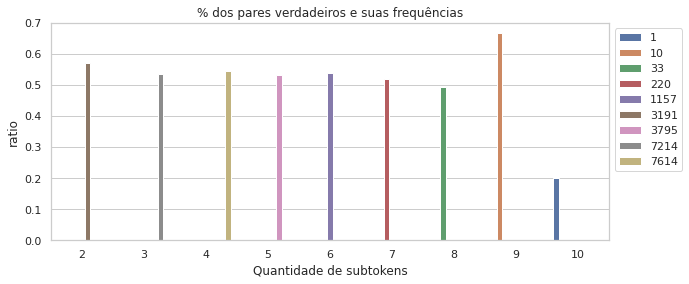

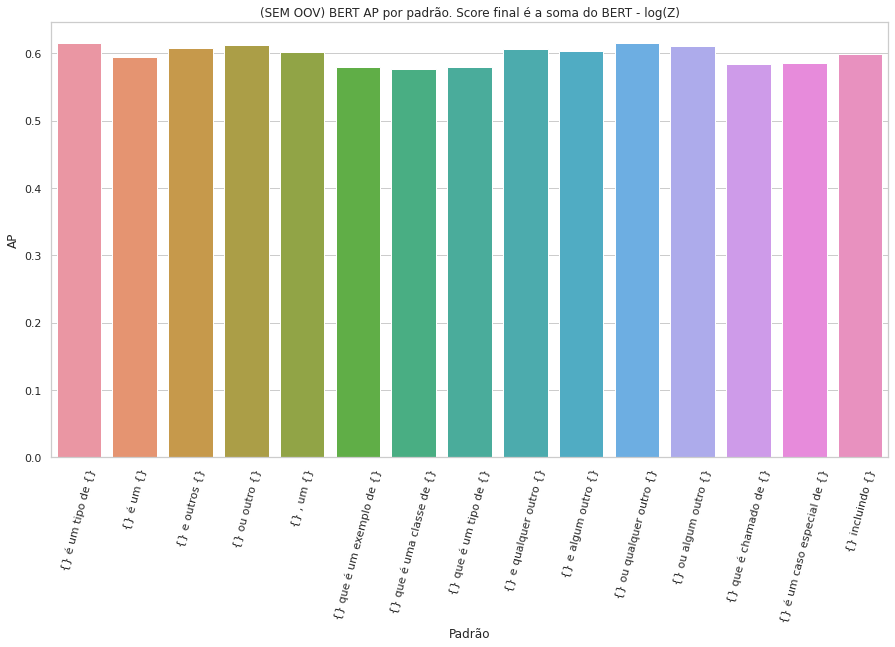

Melhores padrões usando score_final_log(Z)
['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']


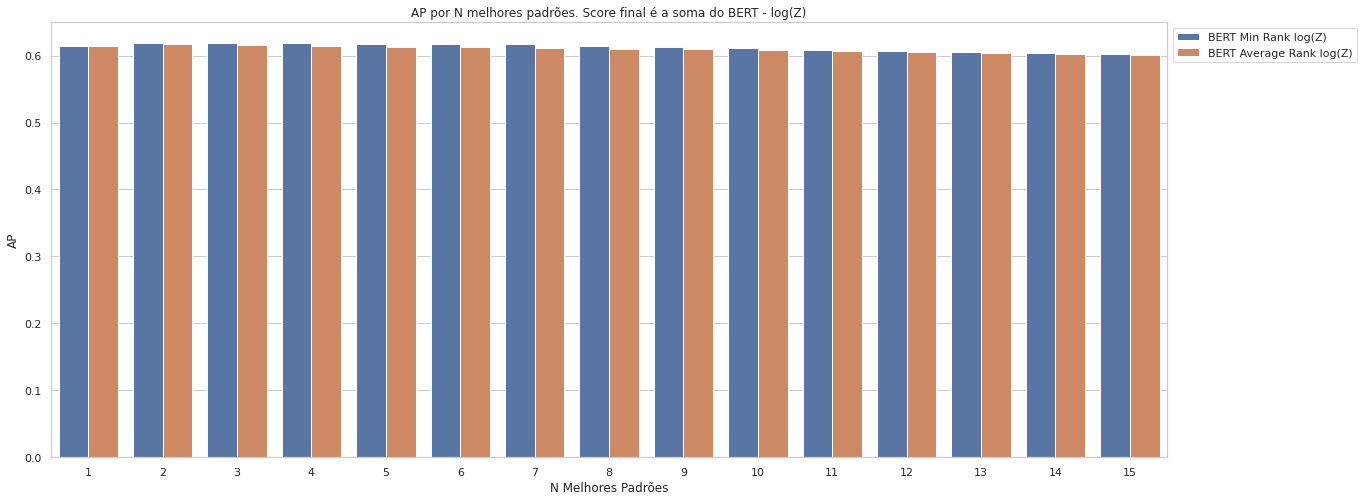

In [11]:
# Balanceamento df_240M
df_240_ratio = nb_utils.balanceamento(df_240, len_size=len_total_unique, patterns=pattern_unique)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_240_ratio)
ax.set(xlabel="Quantidade de subtokens")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))

# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_240, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"(SEM OOV) BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando score_final_log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)


# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_240, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Dados dos gráficos acima. Apenas para visualizar mesmo!

 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z) 
 - Balanceamento do DEV 54.28% True, 45.71% False
 - Total de 42800 pares

In [12]:
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_240, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.616772  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.615469  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.614867  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.614425  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.618626  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.618578  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.618106  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.618013  BERT Min Rank log(Z)
           true         false  total
0  23235.000000  19565.000000  42800
1      0.542874 

_________________________________________________

### DEV Balanceamento do ontoPT-validation com OOV
#### Wikipedia 240M com OOV
 - N = 94446 pares

#### Gŕaficos do BERT log_sum_exp log(Z) no DEV português

 - % de pares verdadeiros por tamanho de sub-token
 - AP por padrão (português) no DEV
 - AP combinando os N melhores padrões (Average rank e Min rank)
 - Balanceamento do DEV 49.86% True, 50.13% False



Balanceamento: [1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!


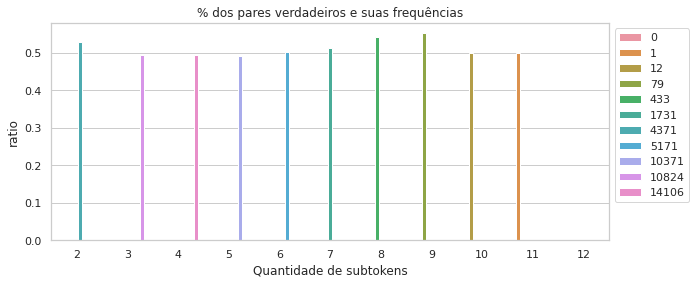

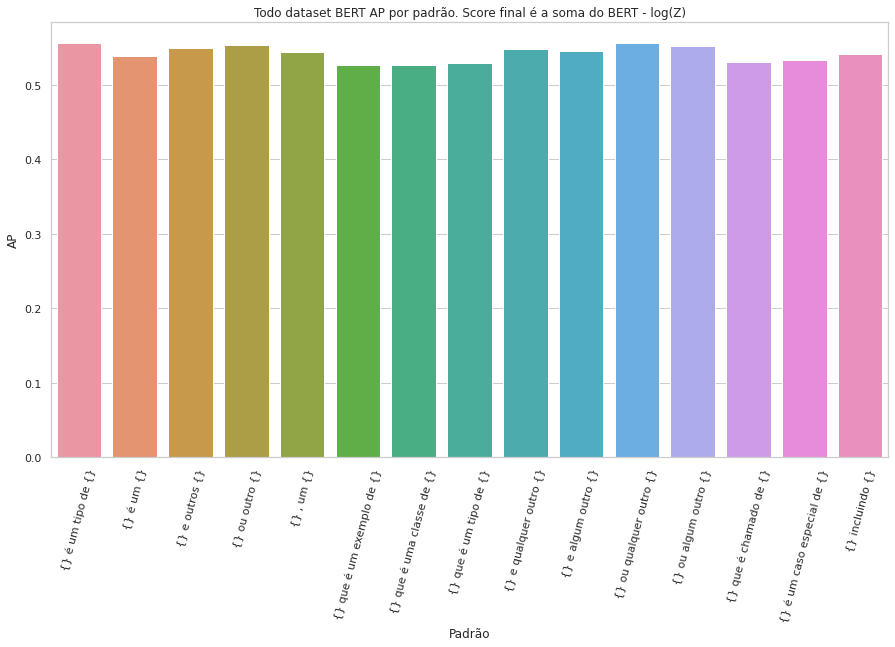

Melhores padrões usando score_final_log(Z)
['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']


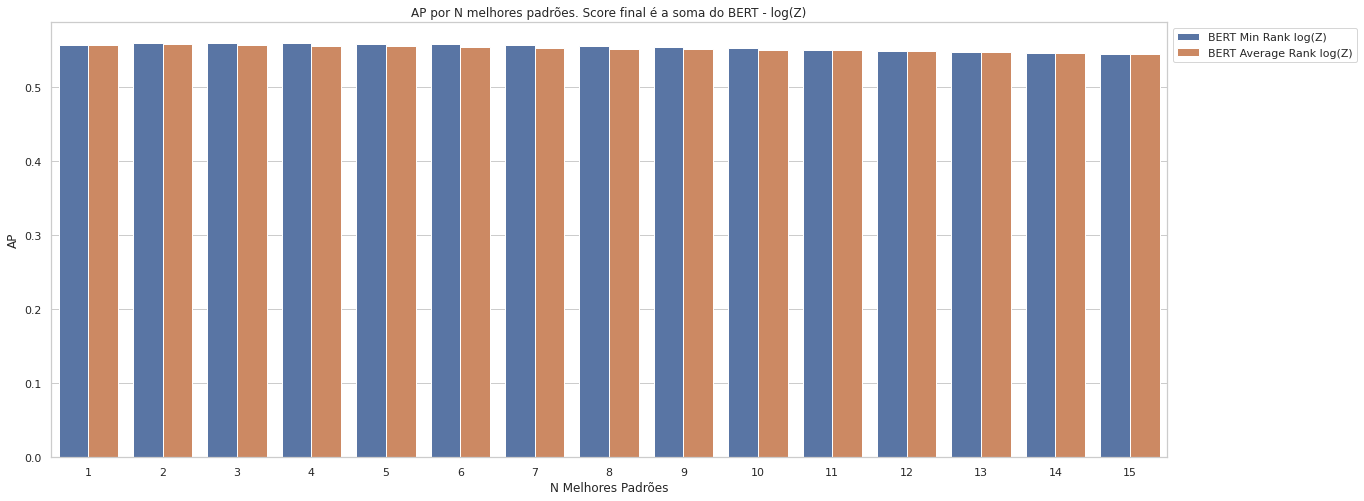

In [13]:
# Balanceamento df_with_oov
df_with_oov_ratio = nb_utils.balanceamento(df_with_oov, len_size=len_total_unique, patterns=pattern_unique)

plt.figure(figsize=(10, 4))
ax = sns.barplot(x="len_total", y="ratio", hue="true", data=df_with_oov_ratio)
ax.set(xlabel="Quantidade de subtokens")
ax.set_title(f"% dos pares verdadeiros e suas frequências")
ax.legend(bbox_to_anchor=(1, 1))

# AP por padrão
df_plot = nb_utils.compute_dataframe_AP_by_pattern(df_with_oov, key_sort="score_final_log(z)", pattern_list=pattern_unique)
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_plot, x='padrao', y='AP')
ax.set(xlabel="Padrão")
ax.set_title(f"Todo dataset BERT AP por padrão. Score final é a soma do BERT - log(Z)")
plt.xticks(rotation=75)
plt.show()

print(f"Melhores padrões usando score_final_log(Z)")
best_pattern_logz = df_plot.sort_values(by='AP', ascending=False)['padrao'].tolist()
print(best_pattern_logz)


# AP por n-rank
df_plot = nb_utils.compute_AP_n_best_pattern(df_with_oov, key_sort="score_final_log(z)", n_best_pattern=best_pattern_logz)
df_plot['method_format'] = df_plot['method'].map(nb_utils.get_method_name_ijcai())
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=df_plot, x='n_best_pattern', y='AP', hue='method_format')
ax.set(xlabel="N Melhores Padrões")
ax.set_title(f"AP por N melhores padrões. Score final é a soma do BERT - log(Z)")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


#### DEV Dados dos gráficos acima. Apenas para visualizar mesmo!
##### DEV usando todo o dataset (COM OOV)
 - mean score_final_log(z) == Average Rank usando BERT - log_sum_exp log(Z)
 - min score_final_log(z)  == Min Rank usando BERT - log_sum_exp log(Z) 
 - Balanceamento do DEV 49.86% True, 50.13% False
 - Total de 94446 pares

In [14]:
df_mean = df_plot[df_plot['method'] == 'mean score_final_log(z)']
df_mean = df_mean.sort_values(by='AP', ascending=False)
print(f"Melhor combinação de Melhores Padrões usando Média dos ranks entre eles")
print(df_mean.iloc[:4])

print(f"Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles")
df_min = df_plot[df_plot['method'] == 'min score_final_log(z)']
df_min = df_min.sort_values(by='AP', ascending=False)
print(df_min.iloc[:4])

# balanceamento do dataset inteiro
df_size = nb_utils.balanceamento_all(df_with_oov, patterns=pattern_unique)
print(df_size)

Melhor combinação de Melhores Padrões usando Média dos ranks entre eles
   n_best_pattern                   method        AP             method_format
3               2  mean score_final_log(z)  0.557288  BERT Average Rank log(Z)
5               3  mean score_final_log(z)  0.556178  BERT Average Rank log(Z)
1               1  mean score_final_log(z)  0.555868  BERT Average Rank log(Z)
7               4  mean score_final_log(z)  0.555246  BERT Average Rank log(Z)
Melhor combinação de Melhores Padrões usando Minimo dos ranks entre eles
   n_best_pattern                  method        AP         method_format
4               3  min score_final_log(z)  0.558960  BERT Min Rank log(Z)
2               2  min score_final_log(z)  0.558936  BERT Min Rank log(Z)
6               4  min score_final_log(z)  0.558514  BERT Min Rank log(Z)
8               5  min score_final_log(z)  0.558157  BERT Min Rank log(Z)
           true         false  total
0  47099.000000  47347.000000  94446
1      0.498687 

-----------------

# Test nos datasets PT-BR


## Test datasets 
 - conceptnet-hypernym-1
 - conceptnet-hypernym-all-relation
 - ontoPT-test

### Sem OOV
 - Usando os 4 melhores padrões

#### Test Gŕaficos do BERT log_sum_exp log(Z) em português SEM OOV

 - AP combinando os N melhores padrões (Average rank e Min rank); N=4
 - conceptnet-hypernym-1 N = 2440
  - True = 49.95%; False = 50.05%
 - conceptnet-hypernym-allrelation N = 14330
  - True = 8.5%; False = 91.5 %


In [15]:
# data path server
path_file_bert = ["../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-1.json",
                 "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/conceptnet-hypernym-allrelation.json",
                 "../../teste/neuralmind-bert-base-portuguese-cased_bert-score_n-subtoken/ontoPT-test.json"]
path_d_w = ["/home/gabrielescobar/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_not_oov/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv",
            "/home/gabrielescobar/dive-pytorch/results/wikipedia-datasets-test/wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX/_result_models_model-wikipedia240M_W10_neg15_e15_lr1e-03_eps1e-08_emb100_batch128_runX_dataset_.-datasets.tsv"]
df_dive_word2vec = pd.read_csv(path_d_w[0], delimiter="\t")
df_dive_word2vec = df_dive_word2vec[df_dive_word2vec['epoch_num'] == 14]
df_240 = {}
df_with_oov = {}
for path_bert_dataset in path_file_bert:
    dname = path_bert_dataset.split("/")[-1][:-4] + "tsv"
    json_data = json.load(open(path_bert_dataset))
    df_240[dname] = nb_utils.create_dataframe(nb_utils.filter_by_vocab(vocabs[4], json_data), separator=" ")
    df_with_oov[dname] = nb_utils.create_dataframe(json_data, separator=" ")

pattern_unique = df_with_oov[dname]['pattern'].unique().tolist()
len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

for dname in df_240.keys():
    print(dname)
    df_now = df_240[dname]
    print(f"DF 240 = {df_now[df_now['pattern'] == pattern_unique[0]].count()['hiponimo']}")
    df_now = df_with_oov[dname]
    print(f"DF all with OOV = {df_now[df_now['pattern'] == pattern_unique[0]].count()['hiponimo']}")

# df com oov
for dname in df_with_oov.keys():
    df_with_oov[dname] = nb_utils.logsumexp_normalization(df_with_oov[dname], len_list=len_total_unique, pattern_list=pattern_unique)

# df 240M sem oov
for dname in df_240.keys():
    df_240[dname] = nb_utils.logsumexp_normalization(df_240[dname], len_list=len_total_unique, pattern_list=pattern_unique)


conceptnet-hypernym-1.tsv
DF 240 = 2440
DF all with OOV = 4646
conceptnet-hypernym-allrelation.tsv
DF 240 = 14330
DF all with OOV = 30474
ontoPT-test.tsv
DF 240 = 388927
DF all with OOV = 850006


In [16]:
# df sem oov

best_pattern_without_oov = ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']
test= ['{} ou qualquer outro {}', '{} é um tipo de {}', '{} ou outro {}', '{} ou algum outro {}', '{} e outros {}', '{} e qualquer outro {}', '{} e algum outro {}', '{} , um {}', '{} incluindo {}', '{} é um {}', '{} é um caso especial de {}', '{} que é chamado de {}', '{} que é um tipo de {}', '{} que é um exemplo de {}', '{} que é uma classe de {}']
assert len(best_pattern_without_oov) == 15
assert test == best_pattern_without_oov


dfs = []
best_pattern_num_train = 4
df_temp = {}
for dname in df_240.keys():
    df_temp[dname] = nb_utils.compute_min_mean_ap_normal(df_240[dname], pattern_list=best_pattern_without_oov, dataset_name=dname, 
                                              best_pattern_num=best_pattern_num_train)

    dfs.append(df_temp[dname])
df_all = pd.concat(dfs)    
df_all = pd.concat([df_all, df_dive_word2vec])
df_all['method_format'] = df_all['method'].map(nb_utils.get_method_name_ijcai())
datasetnames_unique = df_all['dataset'].unique().tolist()
rename_dataset = {}
for k in datasetnames_unique:
    rename_dataset[k] = os.path.basename(k)

df_all['dataset'] = df_all['dataset'].map(rename_dataset)


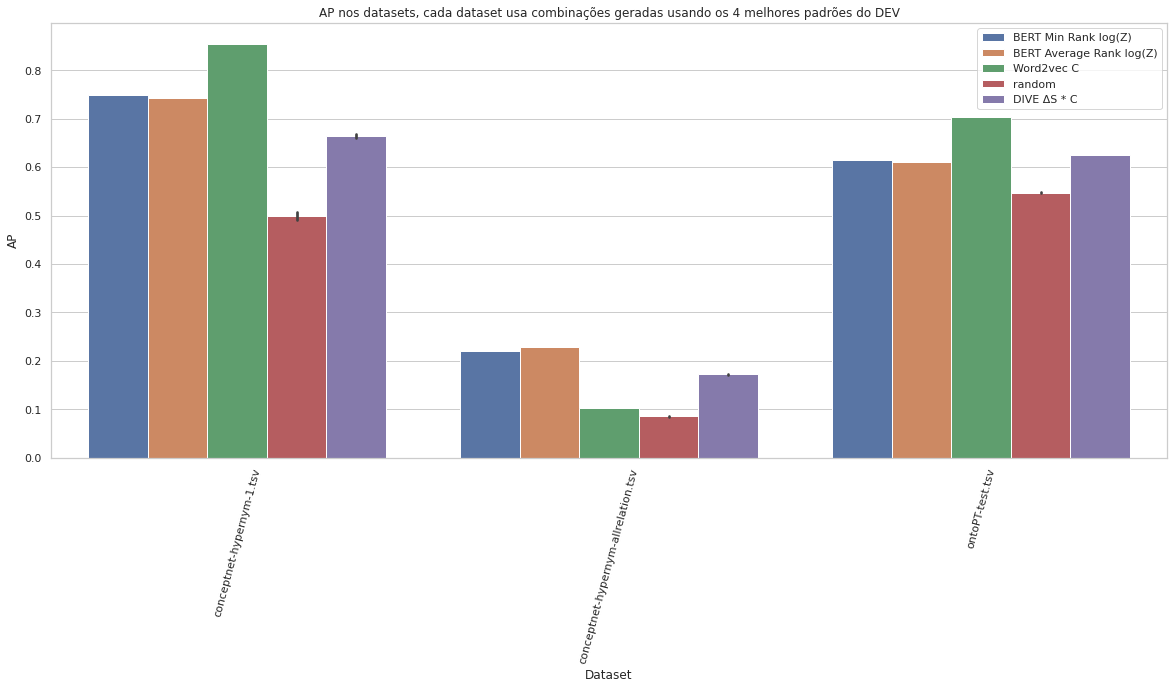

<Figure size 1440x576 with 0 Axes>

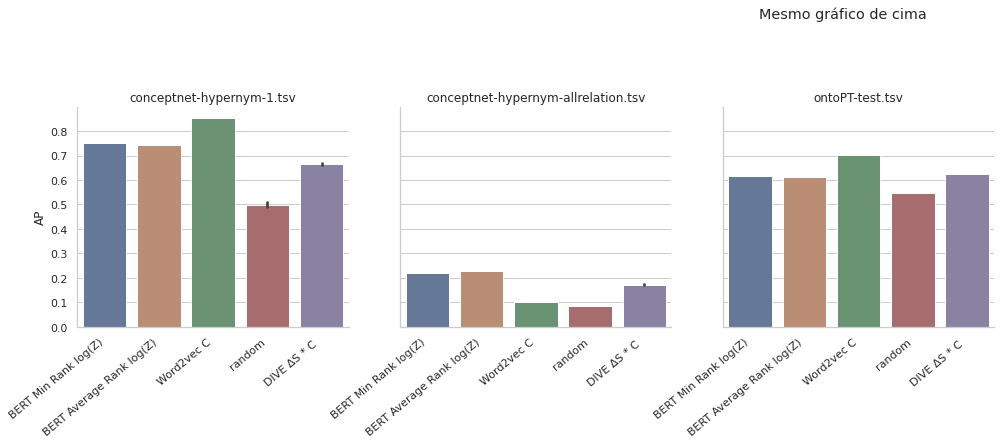

In [17]:
def filter_methods_ijcai(df):
    method_names = ['Word2vec C', 'DIVE \u0394S * C ', 'random', 
                    'BERT Average Rank log(Z)', 'BERT Min Rank log(Z)']
    return df[df['method_format'].isin(method_names)]

plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format", y="AP", ci="sd",data=filter_methods_ijcai(df_all))
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)


plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format", y="AP", col="dataset", col_wrap=5,
                data=filter_methods_ijcai(df_all), saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.7, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')

In [18]:
# balanceamento do dataset inteiro
for dname in df_240.keys():
    df_size = nb_utils.balanceamento_all(df_240[dname], patterns=pattern_unique)
    print(dname)
    print(df_size)


conceptnet-hypernym-1.tsv
         true       false  total
0  1219.00000  1221.00000   2440
1     0.49959     0.50041      1
conceptnet-hypernym-allrelation.tsv
          true         false  total
0  1219.000000  13111.000000  14330
1     0.085066      0.914934      1
ontoPT-test.tsv
            true          false   total
0  212878.000000  176049.000000  388927
1       0.547347       0.452653       1


-----------------------

#### Test Gŕaficos do BERT log_sum_exp log(Z) em português COM OOV
#### Todo os exemplos dos datasets

 - AP combinando os N melhores padrões (Average rank e Min rank); N=4
 - conceptnet-hypernym-1 N = 4646
  - True = 50%; False = 50%
 - conceptnet-hypernym-allrelation N = 14330
  - True = 7.6%; False = 92.4%

In [19]:
# df com oov
# path_d_w [1] == com oov
df_dive_word2vec = pd.read_csv(path_d_w[1], delimiter="\t")
df_dive_word2vec = df_dive_word2vec[df_dive_word2vec['epoch_num'] == 14]
dfs = []
best_pattern_num_train = 4
df_temp = {}
for dname in df_with_oov.keys():
    df_temp[dname] = nb_utils.compute_min_mean_ap_normal(df_with_oov[dname], pattern_list=best_pattern_without_oov, dataset_name=dname, 
                                              best_pattern_num=best_pattern_num_train)

    dfs.append(df_temp[dname])
df_all = pd.concat(dfs)    
df_all = pd.concat([df_all, df_dive_word2vec])
df_all['method_format'] = df_all['method'].map(nb_utils.get_method_name_ijcai())
datasetnames_unique = df_all['dataset'].unique().tolist()
rename_dataset = {}
for k in datasetnames_unique:
    rename_dataset[k] = os.path.basename(k)

df_all['dataset'] = df_all['dataset'].map(rename_dataset)

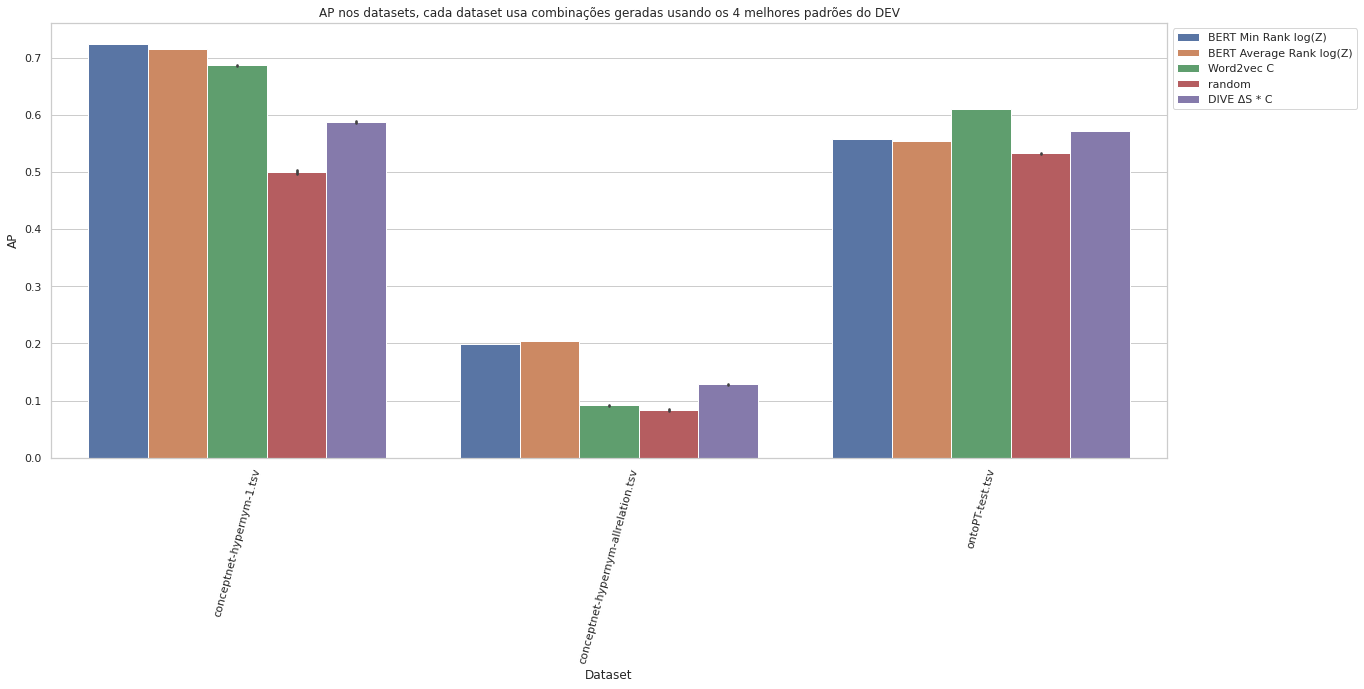

<Figure size 1440x576 with 0 Axes>

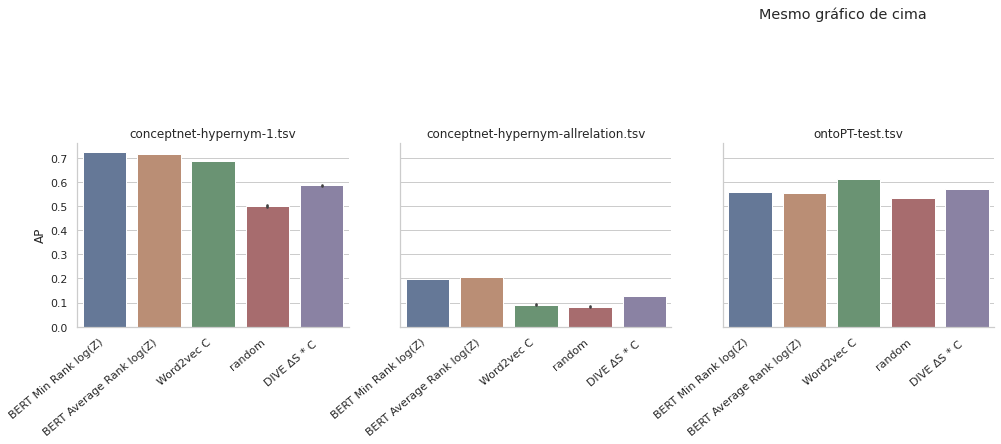

In [20]:

plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format", y="AP", ci="sd",data=filter_methods_ijcai(df_all))
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
legend = ax.get_legend()
_ = plt.xticks(rotation=75)

plt.figure(figsize=(20,8)) # this creates a figure 8 inch wide, 4 inch high
g = sns.catplot(x="method_format", y="AP", col="dataset", col_wrap=5,
                data=filter_methods_ijcai(df_all), saturation=.5,
                kind="bar", ci="sd", aspect=.9, legend='full')
(g.set_axis_labels("", "AP")
    .set_xticklabels(rotation=40, ha="right")
    .set_titles("{col_name}"))
plt.subplots_adjust(top=0.6, hspace=0.3)
_ = g.fig.suptitle('Mesmo gráfico de cima')


In [21]:
# balanceamento do dataset inteiro
for dname in df_with_oov.keys():
    df_size = nb_utils.balanceamento_all(df_with_oov[dname], patterns=pattern_unique)
    print(dname)
    print(df_size)


conceptnet-hypernym-1.tsv
     true   false  total
0  2323.0  2323.0   4646
1     0.5     0.5      1
conceptnet-hypernym-allrelation.tsv
          true         false  total
0  2323.000000  28151.000000  30474
1     0.076229      0.923771      1
ontoPT-test.tsv
            true          false   total
0  425127.000000  424879.000000  850006
1       0.500146       0.499854       1
